In [1]:
#### Modulos
import matplotlib.pylab as plt
%matplotlib inline
import os
import numpy as np
import scipy
from scipy import stats
#################


In [2]:
def ldata(archive):
    f=open(archive)
    data=[]
    for line in f:
        line=line.strip()
        col=line.split()
        data.append(col)
    return data


In [3]:

archive_peltier='completa_peltier_1.txt'
archive_seebeck='completa_seebeck_1.txt'
archive_dif='completa_rendimiento_2.txt'

In [4]:
dataP=ldata(archive_peltier)
dataS=ldata(archive_seebeck)
dataD=ldata(archive_dif)


Efecto Peltier

In [183]:
#variables peltier
kk=273   #obs si kk es 273 trabajamos en Kelvins y si kk es 0 trabajamos en celcius
tiempo=[]
temp1=[]
temp2=[]
volt=[]
ampe=[]
dt=[]
for i in range(len(dataP)):
    tiempo.append(float(dataP[i][0]))
    tt1=100*float(dataP[i][1])+kk
    tt2=100*float(dataP[i][2])+kk
    temp1.append(tt1)
    temp2.append(tt2)
    volt.append(float(dataP[i][3]))
    ampe.append(abs(float(dataP[i][4])))
    dt.append(tt2-tt1)


    

    

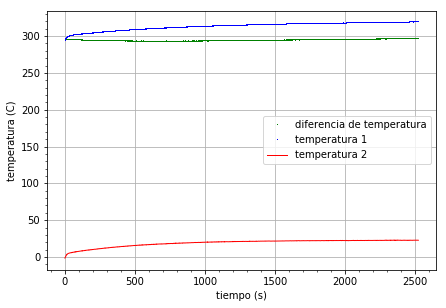

In [184]:
#ploteo efecto peltier
plt.axes([1,1,.90,0.90])
plt.plot(tiempo, temp1, 'g,')
plt.plot(tiempo, temp2, 'b,')
plt.plot(tiempo, dt, 'r-', linewidth=1 )
plt.legend({'temperatura 1' , 'temperatura 2', 'diferencia de temperatura'})
plt.xlabel('tiempo (s)')
plt.ylabel('temperatura (C)')
plt.minorticks_on()
plt.grid()

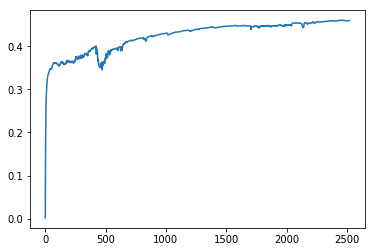

In [207]:
## plotteo corriente 
plt.plot(tiempo,ampe)

In [186]:
#Peltier en el estado estacionario
t_inicial=1500
tiempo_est=[]
temp1_est=[]
temp2_est=[]
volt_est=[]
ampe_est=[]
dt_est=[]
for i in range(len(tiempo)):
    if tiempo[i]>t_inicial:
        tiempo_est.append(tiempo[i])
        temp1_est.append(temp1[i])
        temp2_est.append(temp2[i])
        volt_est.append(volt[i])
        ampe_est.append(ampe[i])
        dt_est.append(dt[i])

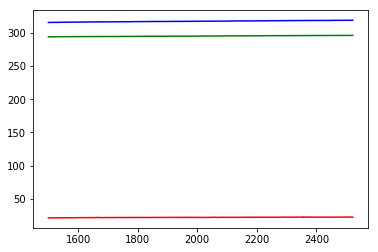

In [187]:
## estaEsto es solo para tener una idea de que se esta promediando en el estado estacionario
plt.plot(tiempo_est, temp1_est, 'g-')
plt.plot(tiempo_est, temp2_est, 'b-')
plt.plot(tiempo_est, dt_est, 'r-', )

In [298]:
#Valores medios en el estado estacionario
Tf=np.mean(temp1_est)
Tc=np.mean(temp2_est)
V=np.mean(volt_est)
I=np.mean(ampe_est)
DT=np.mean(dt)
t_amb=30+kk
print(Tf, Tc, V, I, DT)

294.895376003 317.172536714 2.26321454138 0.451417948276 18.610951289


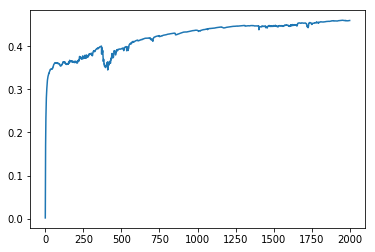

In [269]:
## plotteo corriente 
plt.plot(range(len(tiempo)),ampe)

In [229]:
maximo = []
for i in range(len(ampe)-1750):
    maximo.append(ampe[i+250])
    
maxx=np.max(maximo)
print(maxx)
for i in range(len(ampe)):
    if ampe[i]==maxx:
        V=volt[i]
        Tf=temp1[i]
        Tc=temp2[i]
        I=ampe[i]
        DT=dt[i]

0.400469


Efecto Seebeck

In [270]:
##Seebeck
#variables Seebeck
tiempoS=[]
temp1S=[]
temp2S=[]
voltS=[]

dtS=[]
ni=100
nf=800
for i in range(nf-ni):
    tiempoS.append(float(dataS[i+ni][0]))
    tt1S=100*float(dataS[i+ni][1])+kk
    tt2S=100*float(dataS[i+ni][2])+kk
    temp1S.append(tt1S)
    temp2S.append(tt2S)
    voltS.append(float(dataS[i+ni][3]))
    dtS.append(tt2S-tt1S)
    

slope: 0.061233    intercept: 0.067678
r-squared: 0.999220
p_value: 0.000000
std_err: 0.000065


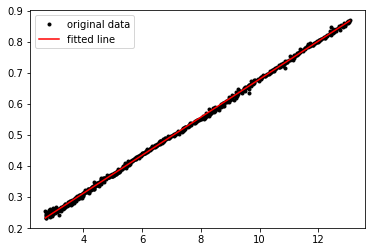

el coeficiente de Seebeck (alfa) 0.06123264348096332


In [271]:
##ajuste lineal en el efecto Seebeck para obtener el coeficiente de Seebeck
x=dtS
y=[v*10 for v in voltS]
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
print("slope: %f    intercept: %f" % (slope, intercept))
print("r-squared: %f" % r_value**2)
print("p_value: %f" % p_value)
print("std_err: %f" % std_err)
yy=[]
for i in range(len(x)):
     yy.append(intercept + slope*x[i])
plt.plot(x, y, 'k.', label='original data')
plt.plot(x, yy, 'r', label='fitted line')
plt.legend()
plt.show()

alfa=float(slope)

print('el coeficiente de Seebeck (alfa) %s'%alfa)

In [272]:
###Resistencia
R=(V-alfa*DT)/I
print('La resistencia es %s'%R)

La resistencia es 2.48908312253


Efecto Joule


In [273]:
##Algunos parametros
m=0.025       ##masa del difusor del aluminio  g
c=0.9    ##calor especifico del aluminio J/g·K
A=0.0004     ##Area de la celda peltier m2
d=0.003    ##ditancia entre las placas de la celda peltier m


In [274]:
#variables Difusividad
tiempoD1=[]
tempD1=[]
voltD1=[]
tiempoD2=[]
tempD2=[]
voltD2=[]
tiempoD3=[]
tempD3=[]
voltD3=[]
Ni1=50
Nf1=250
Ni2=350
Nf2=550
Ni3=650
Nf3=950
for i in range(Nf1-Ni1):
    tiempoD1.append(float(dataD[i+Ni1][0]))
    tempD1.append(100*float(dataD[i+Ni1][1])+kk)
    voltD1.append(float(dataD[i+Ni1][3]))    

for i in range(Nf2-Ni2):
    tiempoD2.append(float(dataD[i+Ni2][0]))
    tempD2.append(100*float(dataD[i+Ni2][1])+kk)
    voltD2.append(float(dataD[i+Ni2][3]))    

for i in range(Nf3-Ni3):
    tiempoD3.append(float(dataD[i+Ni3][0]))
    tempD3.append(100*float(dataD[i+Ni3][1])+kk)
    voltD3.append(float(dataD[i+Ni3][3]))     

 

slope: -0.019404    intercept: 296.306241
r-squared: 0.988523
p_value: 0.000000
std_err: 0.000149


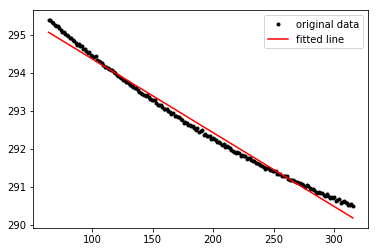

Pf1 = -0.0004365842172295685
El coeficiente de difusividad 1 es K1= 0.318287636792


In [286]:
##ajuste lineal en el experimento de difusividad para encontrar el coeficiente de difusividad
x=tiempoD1
y=tempD1
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
print("slope: %f    intercept: %f" % (slope, intercept))
print("r-squared: %f" % r_value**2)
print("p_value: %f" % p_value)
print("std_err: %f" % std_err)
yy=[]
for i in range(len(x)):
     yy.append(intercept + slope*x[i])
plt.plot(x, y, 'k.', label='original data')
plt.plot(x, yy, 'r', label='fitted line')
plt.legend()
plt.show()

G1=(float(slope))
Pf1=G1*m*c
print('Pf1 = %s'%Pf1)

K1=-(Pf1-alfa*I*Tf+(R*I**2)/2)*(d)/(A*DT)



print('El coeficiente de difusividad 1 es K1= %s'%K1)



slope: -0.005599    intercept: 291.583517
r-squared: 0.989486
p_value: 0.000000
std_err: 0.000041


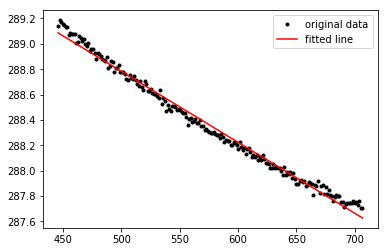

Pf2 = -0.00012596819686259012
El coeficiente de difusividad 2 es K2= 3.18275119322


In [287]:
##ajuste lineal en el experimento de difusividad para encontrar el coeficiente de difusividad
x=tiempoD2
y=tempD2
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
print("slope: %f    intercept: %f" % (slope, intercept))
print("r-squared: %f" % r_value**2)
print("p_value: %f" % p_value)
print("std_err: %f" % std_err)
yy=[]
for i in range(len(x)):
     yy.append(intercept + slope*x[i])
plt.plot(x, y, 'k.', label='original data')
plt.plot(x, yy, 'r', label='fitted line')
plt.legend()
plt.show()

G2=(float(slope))
Pf2=G2*m*c
print('Pf2 = %s'%Pf2)

K2=-(Pf2-alfa*I*Tf+(R*I**2)/2)*(d)/(A*DT)



print('El coeficiente de difusividad 2 es K2= %s'%K2)


slope: -0.001554    intercept: 288.511765
r-squared: 0.947969
p_value: 0.000000
std_err: 0.000021


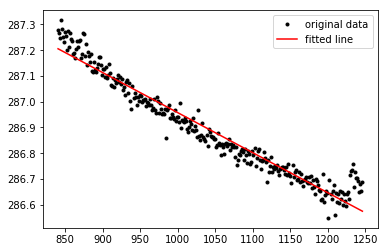

Pf3 -3.497295088778979e-05
El coeficiente de difusividad 3 es K3= 3.18271452318


In [288]:
##ajuste lineal en el experimento de difusividad para encontrar el coeficiente de difusividad
x=tiempoD3
y=tempD3
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
print("slope: %f    intercept: %f" % (slope, intercept))
print("r-squared: %f" % r_value**2)
print("p_value: %f" % p_value)
print("std_err: %f" % std_err)
yy=[]
for i in range(len(x)):
     yy.append(intercept + slope*x[i])
plt.plot(x, y, 'k.', label='original data')
plt.plot(x, yy, 'r', label='fitted line')
plt.legend()
plt.show()

G3=(float(slope))
Pf3=G3*m*c
print('Pf3 %s'%Pf3)

K3=-(Pf3-alfa*I*Tf+(R*I**2)/2)*(d)/(A*DT)



print('El coeficiente de difusividad 3 es K3= %s'%K3)



In [289]:
print(K1, K2,K3)

0.318287636792 3.18275119322 3.18271452318


In [290]:
###Obs Tc>Tf
K=K1
dQf=-I*alfa*Tf-K*(Tf-Tc)+(R*(I**2))/2
dQc=+I*alfa*Tc-K*(Tc-Tf)+(R*(I**2))/2
dW=V*I

In [291]:
n=-dW/(-dQc)
COP=-dQf/dW
print('n= %s'%n)
print('COP= %s'%COP)

n= 0.529301853162
COP= 0.790089602084


In [292]:
dQc

1.9301947625446898

In [293]:
dQf

-0.80719951765073816

In [294]:
print('Los parametros que relamente me interesan son:')
print('el coeficiente de Seebeck alfa= %s'%alfa)
print('el rendimiento como maquina frigorifica COP= %s'%COP)
print('El coeficiente de conductividad K= %s'%K1)

Los parametros que relamente me interesan son:
el coeficiente de Seebeck alfa= 0.06123264348096332
el rendimiento como maquina frigorifica COP= 0.790089602084
El coeficiente de conductividad K= 0.318287636792


In [295]:
7*10e-3

0.07

In [296]:
100/373

0.2680965147453083